In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

%matplotlib inline

In [2]:
df = pd.read_csv('employees_data.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,8,0,1.0,6,1,0,0,3.0,4.0,2.0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,8,1,6.0,3,5,1,4,3.0,2.0,4.0
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,8,3,5.0,2,5,0,3,2.0,2.0,1.0
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,8,3,13.0,5,8,7,5,4.0,4.0,3.0
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,8,2,9.0,2,6,0,4,4.0,1.0,3.0


In [4]:
df.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000


In [5]:
#Show missing values per column
missing_val = df.isnull().sum()

In [6]:
missing_val

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
dtype: int64

In [7]:
#Unique values in each column
unique_list = []
for col in df.columns:
    print('{}: {}'.format(col,  len(df[col].unique())))
    if len(df[col].unique()) == 1:
        unique_list.append(col)
print(unique_list)

Age: 43
Attrition: 2
BusinessTravel: 3
Department: 3
DistanceFromHome: 29
Education: 5
EducationField: 6
EmployeeCount: 1
EmployeeID: 4410
Gender: 2
JobLevel: 5
JobRole: 9
MaritalStatus: 3
MonthlyIncome: 1349
NumCompaniesWorked: 11
Over18: 1
PercentSalaryHike: 15
StandardHours: 1
StockOptionLevel: 4
TotalWorkingYears: 41
TrainingTimesLastYear: 7
YearsAtCompany: 37
YearsSinceLastPromotion: 16
YearsWithCurrManager: 18
EnvironmentSatisfaction: 5
JobSatisfaction: 5
WorkLifeBalance: 5
['EmployeeCount', 'Over18', 'StandardHours']


In [8]:
#Drop columns with 1 unique values
df = df.drop(columns = unique_list)
df.shape

(4410, 24)

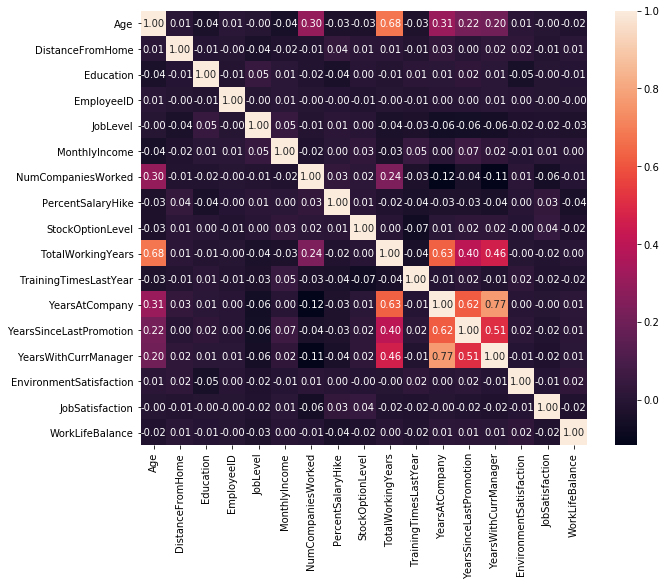

In [9]:
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f");

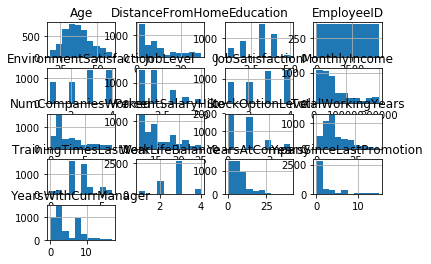

In [10]:
df.hist();

In [11]:
#Encoding the Attrition column
att_to_num = lambda x: 1 if x=='Yes' else 0
df['Attrition'] = df['Attrition'].apply(att_to_num)

In [12]:
#Grouping the Attrition based on the conducted training times per employee last year
no = df['Attrition'][df['Attrition']==0].groupby(by=df['TrainingTimesLastYear']).count()
no_df = pd.DataFrame(no/no.sum())
no_df.rename(columns={'TrainingTimesLastYear': 'TrainingTimes', 'Attrition': 'Att_no'}, inplace=True)

yes = df['Attrition'][df['Attrition']==1].groupby(by=df['TrainingTimesLastYear']).count()
yes_df = pd.DataFrame(yes/yes.sum())
yes_df.rename(columns={'TrainingTimesLastYear': 'TrainingTimes', 'Attrition': 'Att_yes'}, inplace=True)

In [13]:
#Plotting the results 
comp_df = pd.merge(no_df, yes_df, left_index=True, right_index=True)
comp_df.columns = [ 'att_no', 'att_yes']
comp_df['Atrrition_Differencies'] = comp_df['att_no'] - comp_df['att_yes']
comp_df.style.bar(subset=['Atrrition_Differencies'], align='mid', color=['#d65f5f', '#5fba7d'])

,att_no,att_yes,Atrrition_Differencies
TrainingTimesLastYear,,,
0,0.0356853,0.0421941,-0.00650877
1,0.0494728,0.0421941,0.00727874
2,0.367397,0.396624,-0.0292279
3,0.328467,0.362869,-0.034402
4,0.0867802,0.0675105,0.0192697
5,0.0827251,0.07173,0.0109951
6,0.0494728,0.0168776,0.0325952


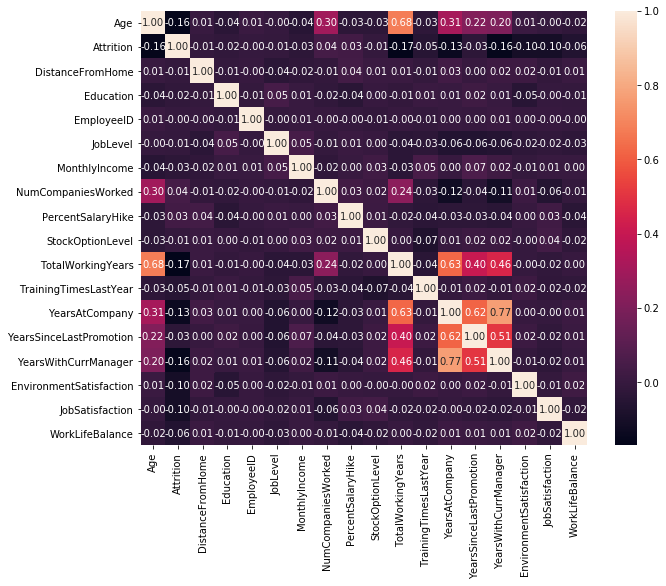

In [14]:
#Creating a heatmap after encoding the Attrition column to find new correlations
fig, ax = plt.subplots(figsize=(10,8)) 
sns.heatmap(df.corr(), annot=True, fmt=".2f");

In [15]:
#Detecting catagorical features after date covertion
cata_list = df.select_dtypes(include=['object']).columns
cata_list

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [16]:
#Create dummy columns for all the categorical variables
for col in cata_list:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True)], axis=1)
        except:
            continue
df.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,51,0,6,2,1,1,131160,1.0,11,0,...,0,0,0,0,0,0,0,0,1,0
1,31,1,10,1,2,1,41890,0.0,23,1,...,0,0,0,0,0,1,0,0,0,1
2,32,0,17,4,3,4,193280,1.0,15,3,...,0,0,0,0,0,0,1,0,1,0
3,38,0,2,5,4,3,83210,3.0,11,3,...,1,0,0,0,0,0,0,0,1,0
4,32,0,10,1,5,1,23420,4.0,12,2,...,0,0,0,0,0,0,1,0,0,1


In [17]:
#Split the data to X,y subsets 
X = df.drop(columns = ['Attrition', 'EmployeeID'])
y = df[['Attrition']]

In [18]:
#Creating a copy of X
X_copy = X

In [19]:
#Creating a list of columns with missing values
missing_list = []
for col in X.columns:
    if X[col].isnull().sum() > 0:
        missing_list.append(col)
print(missing_list)

['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance']


In [20]:
#Impute NaN values with the most frequent values in each column
freq = SimpleImputer(strategy='most_frequent')
X = pd.DataFrame(freq.fit_transform(X))

In [21]:
#Creating the new df 
X.columns = X_copy.columns
X.index = X_copy.index

In [22]:
# Apply feature scaling to the X subset
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [23]:
X = pd.DataFrame(X, columns=list(X_copy))

In [24]:
X.head()

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,1.541369,-0.393938,-0.891688,-0.961486,1.405136,-0.676179,-1.150554,-0.932014,-1.322079,2.483396,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
1,-0.648668,0.099639,-1.868426,-0.961486,-0.491661,-1.076870,2.129306,0.241988,-0.678877,0.155707,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,-0.918921,1.458650
2,-0.539166,0.963398,1.061787,1.749610,2.725053,-0.676179,-0.057267,2.589994,-0.807517,-0.620189,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565
3,0.117845,-0.887515,2.038524,0.845911,0.386301,0.125205,-1.150554,2.589994,0.221606,1.707500,...,5.221995,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565
4,-0.539166,0.099639,-1.868426,-0.961486,-0.884109,0.525897,-0.877232,1.415991,-0.292956,-0.620189,...,-0.191498,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650


In [25]:
#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
        
#Creating SVC model and predict The accuracy score 
SVC_clf = SVC(gamma='auto', random_state=42, kernel = 'linear')
SVC_clf.fit(X_train, y_train)
clf_pred = SVC_clf.predict(X_test)
print("The accuracy_score score for the SVC_model is: {}".format(accuracy_score(y_test, clf_pred)))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The accuracy_score score for the SVC_model is: 0.8427815570672713


In [26]:
#Check for features coefficient in the SVC prediction results
def coef_weights(coefficients, X_train):

    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = SVC_clf.coef_[0]
    coefs_df['abs_coefs'] = np.abs(SVC_clf.coef_[0])
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(SVC_clf.coef_, X_train)

#A quick look at the top results
coef_df.head(20)

,est_int,coefs,abs_coefs
20,EducationField_Life Sciences,-0.000312,0.000312
22,EducationField_Medical,-0.000274,0.000274
21,EducationField_Marketing,-0.000211,0.000211
24,EducationField_Technical Degree,-0.000200,0.000200
23,EducationField_Other,-0.000110,0.000110
18,Department_Research & Development,0.000102,0.000102
19,Department_Sales,0.000092,0.000092
27,JobRole_Laboratory Technician,-0.000074,0.000074
16,BusinessTravel_Travel_Frequently,0.000072,0.000072
10,YearsAtCompany,-0.000070,0.000070


In [44]:
#Creating optimal rfc model with GridSearchCV for optimal model and to avoid overfitting
rfc = RandomForestClassifier(random_state=42)

param_grid =  { 
    'n_estimators': [100, 200, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_split':[2, 4, 6],
    'max_depth' : [10, 12, 14],
    'criterion' :['gini', 'entropy']}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [45]:
#Reviewing the optimal rfc model parameters
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 500}

In [46]:
#Predicting the X_test 
rfc_preds = CV_rfc.predict(X_test)

In [47]:
#Creating efficiency scores function
def print_metrics(y_true, preds, model_name=None):
    print('Accuracy score for ' + model_name + ' :' , format(accuracy_score(y_true, preds)))
    print('Precision score ' + model_name + ' :', format(precision_score(y_true, preds)))
    print('Recall score ' + model_name + ' :', format(recall_score(y_true, preds)))
    print('F1 score ' + model_name + ' :', format(f1_score(y_true, preds)))
    print('\n\n')

In [48]:
#efficiency scores for the rfc predictions
print_metrics(y_test, rfc_preds, model_name='random_forests')

Accuracy score for random_forests : 0.9780801209372638
Precision score random_forests : 0.9837837837837838
Recall score random_forests : 0.875
F1 score random_forests : 0.9262086513994912





In [49]:
print(classification_report(y_test,rfc_preds))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1115
           1       0.98      0.88      0.93       208

    accuracy                           0.98      1323
   macro avg       0.98      0.94      0.96      1323
weighted avg       0.98      0.98      0.98      1323

